In [1]:
from zget_data import get_responses, get_qdetails, page_map, attention
import pandas as pd
import json

In [2]:
password_response, time_response, survey_response = get_responses(2)

## Password Analysis

In [3]:
pd.DataFrame(password_response)

,password2,password2_recall1,password2_recall2,password2_recall3
0,Password123!,NaN,NaN,NaN
1,IWTCDTE!,NaN,NaN,NaN
2,MD!wtsf,NaN,NaN,NaN
3,victor12,NaN,NaN,NaN
4,Igmp4mn@,NaN,NaN,NaN
5,tiabobs662!,tiabobs6662!,tiabobs666!,tiabobs662!!
6,@1mfgfwam,NaN,NaN,NaN
7,Iwaad9msd%,Iwaad(msd%,NaN,NaN


## Time Analysis

In [4]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
page_time_df

,startstudy,fpasssurvey,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,1.901,15.514,5.053,110.151,181.442,86.245,4.489,94.392,17.619,37.438,7.374,22.499,9.735283
1,5.027,10.247,9.382,129.634,38.683,218.244,10.890,51.043,13.859,28.621,9.081,34.495,9.320100
2,4.906,17.022,13.134,105.295,60.117,183.871,13.250,34.445,28.712,33.622,18.875,37.998,9.187450
3,2.940,12.141,3.681,6.817,39.180,71.572,9.222,35.332,11.988,27.655,11.361,24.696,4.276417
4,2.485,16.383,7.331,308.071,66.561,126.521,10.619,77.017,8.537,31.096,20.769,32.279,11.794483
5,8.033,27.238,9.347,70.733,55.126,201.026,33.332,40.583,32.653,48.718,62.304,48.285,10.622967
6,5.678,25.582,7.830,77.622,79.934,349.646,30.243,178.283,31.332,62.327,17.366,59.918,15.429350
7,5.858,34.579,7.189,16.132,188.182,237.826,16.461,105.891,51.271,57.666,45.873,73.352,14.004667


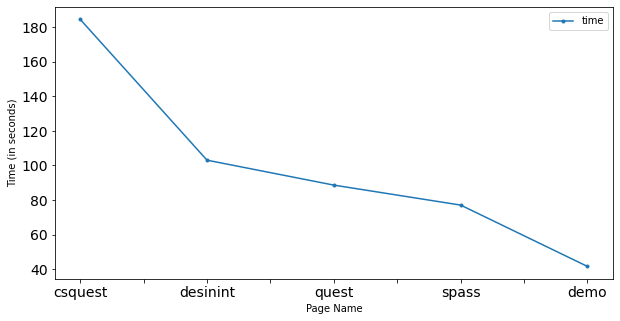

In [5]:
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.mean().sort_values(ascending=False).head(5).items():
    top5 = top5.append(pd.DataFrame([[i, data]], columns=top5.columns), ignore_index=True)

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in seconds)", fontsize=14, style=".-")

## Survey Response Analysis

In [6]:
survey_response_df = pd.DataFrame(survey_response)

### Quest

In [7]:
normqsid = ['1-2', '1-4', '1-7', '1-10', '1-12', '1-13', '1-16']
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
quest.drop(attention.get('7'), inplace=True)
normquest = 8 - quest.loc[normqsid]
quest.update(normquest)

new_index = {}
for qsid in quest.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('7', qsid).replace("'", '"')).get('elements').get(likert_scale)
new_index
quest = quest.rename(new_index)
quest['mean'] = quest.mean(axis=1)
quest['median'] = quest.median(axis=1)
quest

,0,1,2,3,4,5,6,7,mean,median
organized,4.0,7.0,7.0,5.0,6.0,7.0,7.0,4.0,5.875,6.000
rewarding,2.0,5.0,4.0,2.0,6.0,6.0,6.0,7.0,4.750,5.000
ordered,3.0,5.0,6.0,3.0,7.0,7.0,7.0,5.0,5.375,5.375
beneficial,2.0,6.0,6.0,3.0,6.0,7.0,6.0,7.0,5.375,6.000
structured,5.0,6.0,6.0,5.0,6.0,6.0,7.0,2.0,5.375,6.000
helpful,3.0,6.0,7.0,6.0,6.0,7.0,7.0,7.0,6.125,6.125
well grouped,3.0,6.0,6.0,6.0,6.0,6.0,7.0,5.0,5.625,6.000
understandable,2.0,6.0,7.0,6.0,6.0,7.0,7.0,7.0,6.000,6.000
stylish,3.0,5.0,2.0,3.0,6.0,6.0,5.0,5.0,4.375,5.000
clear,2.0,6.0,7.0,3.0,7.0,6.0,7.0,6.0,5.500,6.000


### CSQuest

In [8]:
csquest = pd.DataFrame(survey_response_df['8'].to_dict())

qualindex = ['9-1', '11-1']
csquestqual = csquest.loc[qualindex]
csquestqual.to_csv('qualitative/csquest_conversation.csv')
csquestqual

,0,1,2,3,4,5,6,7
9-1,[None of the above],"[Social Media, Financial Websites, E-commerce ...","[Social Media, Course Management Websites, e.g...","[Social Media, Email]","[Social Media, Email, Financial Websites]","[Social Media, Financial Websites, E-commerce ...","[Social Media, Email, Course Management Websit...","[Social Media, Financial Websites, Gaming Webs..."
11-1,I thought about if I would personally use this...,It is nice. Simple to read and understand. S...,I think that it is clean and concise and under...,easy,It is novel and creative way of learning how t...,I think it's a great idea and a nice design. ...,"I mean this is pretty great, if quite a bit to...",It's very creative and easy to understand with...


In [9]:
csquestquant = csquest.drop(qualindex).fillna(0).astype(int)
csquestquant.drop(attention.get('8'), inplace=True)

normqsid = []
normcsquestquant = 8 - csquestquant.loc[normqsid]
csquestquant.update(normquest)

new_index = {}
for qsid in csquestquant.index:
    new_index[qsid] = json.loads(get_qdetails('8', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
csquestquant = csquestquant.rename(new_index)
csquestquant['mean'] = csquestquant.mean(axis=1)
csquestquant['median'] = csquestquant.median(axis=1)

csquestquant

,0,1,2,3,4,5,6,7,mean,median
Stimulates me to create a strong password,6.0,6.0,4.0,4.0,7.0,7.0,5.0,7.0,5.750,6.000
Makes me put trust on the presented password creation strategy,5.0,5.0,5.0,4.0,7.0,7.0,4.0,6.0,5.375,5.000
Encourages me to use the presented password creation strategy in real life,5.0,6.0,6.0,4.0,7.0,7.0,4.0,7.0,5.750,6.000
,5.0,6.0,6.0,5.0,7.0,7.0,7.0,7.0,6.250,6.250
Encourages me to create a strong password,6.0,7.0,4.0,5.0,7.0,6.0,6.0,7.0,6.000,6.000
Makes me feel capable of creating a strong password,4.0,7.0,6.0,4.0,7.0,7.0,7.0,7.0,6.125,7.000
Makes me feel confident that I can create a strong password,5.0,7.0,6.0,5.0,7.0,7.0,7.0,7.0,6.375,7.000
,3.0,4.0,7.0,4.0,7.0,7.0,5.0,7.0,5.500,5.500
,5.0,5.0,7.0,5.0,7.0,7.0,7.0,5.0,6.000,6.000
Novel,2.0,5.0,3.0,5.0,6.0,6.0,7.0,6.0,5.000,5.000


### First Password Survey

In [10]:
normqsid = []
fpass = pd.DataFrame(survey_response_df['3'].to_dict()).astype(int)
normfpass = 8 - fpass.loc[normqsid]
fpass.update(normfpass)
fpass

new_index = {}
for qsid in fpass.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('3', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
fpass = fpass.rename(new_index)
fpass['mean'] = fpass.mean(axis=1)
fpass['median'] = fpass.median(axis=1)
fpass

,0,1,2,3,4,5,6,7,mean,median
"I do not change my passwords, unless I have to.",7,2,7,6,6,6,6,5,5.625,6.000
I use different passwords for different online accounts that I have.,5,6,1,5,1,3,4,2,3.375,3.375
"When I create a new online account, I try to use a password that goes beyond the site’s minimum requirements.",6,6,1,4,2,6,6,7,4.750,6.000
I do not include special characters in my password if it’s not required.,4,2,5,4,5,1,2,2,3.125,3.125


### Second Password Survey

In [11]:
spass = pd.DataFrame(survey_response_df['12'].to_dict())

qualindex = ['8-1']
spassqual = spass.loc[qualindex]
spassqual

,0,1,2,3,4,5,6,7
8-1,I used a totally different strategy.,I used a variation of the strategy presented i...,I used the same strategy presented in the design.,I used a totally different strategy.,I used the same strategy presented in the design.,I used a variation of the strategy presented i...,I used the same strategy presented in the design.,I used the same strategy presented in the design.


In [12]:
spassquant = spass.drop(qualindex).fillna(0).astype(int)
spassquant.drop(attention.get('8'), inplace=True)

normqsid = []
normspassquant = 8 - spassquant.loc[normqsid]
spassquant.update(normquest)

new_index = {}
for qsid in spassquant.index:
    new_index[qsid] = json.loads(get_qdetails('12', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
spassquant = spassquant.rename(new_index)
spassquant['mean'] = spassquant.mean(axis=1)
spassquant['median'] = spassquant.median(axis=1)

spassquant

,0,1,2,3,4,5,6,7,mean,median
,5,6,5,5,7,6,6,7,5.875,6.000
Hard to remember,1,2,2,5,1,5,1,1,2.250,2.000
Can be easily guessed by a hacker,1,2,2,5,1,2,2,1,2.000,2.000
Can be easily guessed by my close friends or family members,1,1,1,4,1,2,1,1,1.500,1.000
Stronger than the passwords I usually use,4,4,4,5,7,4,6,5,4.875,4.875
,2,2,2,2,2,2,2,2,2.000,2.000
,2,5,7,4,7,6,6,7,5.500,6.000
,3,1,2,4,1,2,1,5,2.375,2.000


### Demographics

In [13]:
demo = pd.DataFrame(survey_response_df['14'].to_dict())

new_index = {}
for qsid in demo.index:
    new_index[qsid] = get_qdetails('14', qsid, 'keyword').split('\n')[0]

demo = demo.rename(new_index).transpose()
demo

,gender,age,race,highest education,education field,occupation,tech experience,cyber experience,adoption security expert
0,Man,30-34 years old,[White],Four-year College Degree,"Medicine, Nursing, and Health Sciences",Business or industry,Self-taught,Self-taught,5
1,Man,35-39 years old,[White],Four-year College Degree,Business,Business or industry,Self-taught,No experience,7
2,Woman,55-59 years old,[White],Graduate degree (MS/Doctorate),"Mathematics, and Natural Sciences (Physics, Ch...",Non-profit organization,Self-taught,No experience,7
3,Woman,25-29 years old,[White],Four-year College Degree,"Journalism, Media and Communication",Business or industry,Formal training,Formal training,5
4,Woman,30-34 years old,[White],Four-year College Degree,I prefer not to answer,Business or industry,No experience,No experience,6
5,Woman,50-54 years old,[White],Four-year College Degree,"Economics, Humanities and Social Sciences",Business or industry,Self-taught,Self-taught,6
6,Man,35-39 years old,[White],Graduate degree (MS/Doctorate),"Economics, Humanities and Social Sciences",Business or industry,Self-taught,No experience,6
7,Woman,30-34 years old,[White],Four-year College Degree,Business,Business or industry,Formal training,No experience,7


In [14]:
demo['gender'].value_counts()

Woman    5
Man      3
Name: gender, dtype: int64